**任务:**
基于usa_housing_price.csv数据，建立线性回归模型，预测合理房价：  
1、以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果  
2、以income、house age、numbers of rooms、population、area为输入变量，建立多因子模型，评估模型表现  
3、预测Income=65000, House Age=5, Number of Rooms=5, Population=30000,size=200的合理房价  
X_test = [65000,5,5,30000,200]

In [2]:
# 加载数据
import pandas as pd
import numpy as np
data = pd.read_csv("usa_housing_price.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


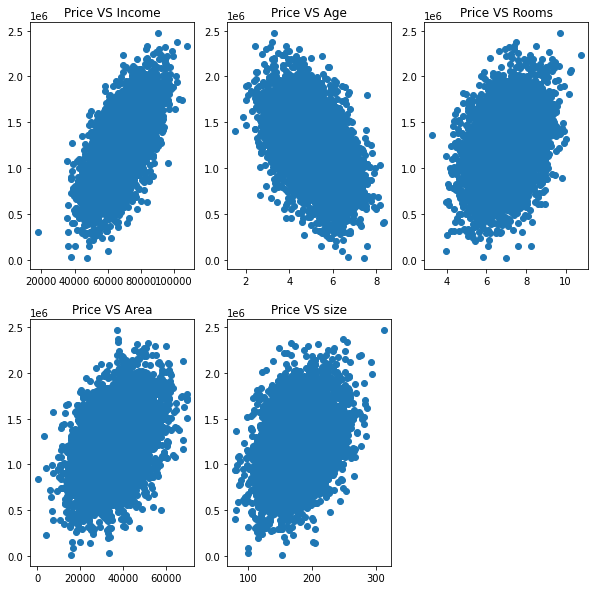

In [12]:
# 画图展示
from matplotlib import pyplot as plt
# 价格数组
priceArr = data.loc[:,'Price']

fig = plt.figure(figsize=(10, 10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:, 'Avg. Area Income'], priceArr)
plt.title('Price VS Income')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:, 'Avg. Area House Age'], priceArr)
plt.title('Price VS Age')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:, 'Avg. Area Number of Rooms'], priceArr)
plt.title('Price VS Rooms')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:, 'Area Population'], priceArr)
plt.title('Price VS Area')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:, 'size'], priceArr)
plt.title('Price VS size')

plt.show()


In [13]:
# 以面积为输入变量，建立单因子模型
x_size = data.loc[:, 'size']
y = data.loc[:,'Price']
# 创建单因子线性模型
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
# 模型转化
x_size = np.array(x_size).reshape(-1, 1)
# 训练模型
LR1.fit(x_size, y)

LinearRegression()

In [14]:
# 预测
y_predict_with_size = LR1.predict(x_size);
print(y_predict_with_size)

[1276881.85636623 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


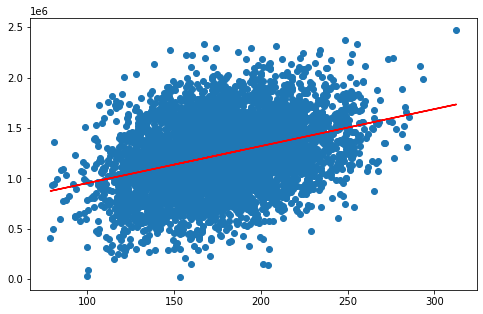

In [15]:
# 创建单因子的结果图
fig6 = plt.figure(figsize=(8,5))
plt.scatter(x_size, y) # 原价格
plt.plot(x_size, y_predict_with_size, 'r') # 预测的表示
plt.show()

In [17]:
# 多因子，x_multi
x_multi = data.drop(['Price'], axis=1)
x_multi.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273544
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659


In [18]:
# 创建模型
LR2 = LinearRegression()
LR2.fit(x_multi, y)

LinearRegression()

In [19]:
# 进行预测
y_predict_multi = LR2.predict(x_multi)
print(y_predict_multi)

[1223968.89166086 1497306.3318863  1250884.31019438 ... 1020693.92390375
 1260503.36914586 1302737.7915763 ]


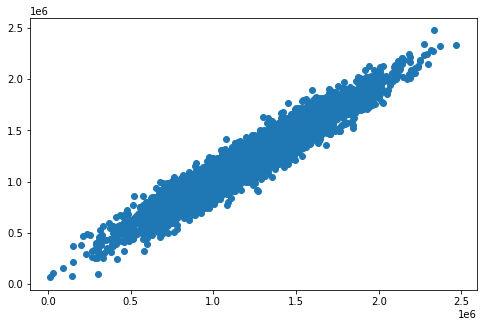

In [20]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_multi)
plt.show()

In [35]:
# 具体测试
x_test = np.array([65000,5,5,30000,200]).reshape(1, -1)
print(x_test)

X_test = [65000,5,5,30000,200]
X_test = np.array(X_test).reshape(1,-1)
print(X_test)

[[65000     5     5 30000   200]]
[[65000     5     5 30000   200]]


In [36]:
y_test = LR2.predict(X_test)
print(y_test)

[817052.19516298]
